<a href="https://colab.research.google.com/github/kokejohh/PMU_Module_3/blob/main/PMU_B_MLModels_KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors
จัดทำโดย จิรายุ เพชรแหน ภาควิชาวิศวกรรมคอมพิวเตอร์ คณะวิศวกรรมศาสตร์ สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง

----

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")
folder_path = path
print(os.listdir(folder_path))

csv_path = os.path.join(folder_path, 'penguins_size.csv') # เลือก penguins_size.csv
penguins = pd.read_csv(csv_path)

penguins.head()

100%|██████████| 11.3k/11.3k [00:00<00:00, 5.70MB/s]

Extracting files...
['penguins_size.csv', 'penguins_lter.csv']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
print(f"{penguins.isna().any()}")
# .isna() returns a DataFrame of the same shape as 'penguins',
# with True where the values are NaN (missing) and False otherwise.
# .any() applied on this DataFrame defaults to axis=0 (column-wise),
# so it returns a Series of booleans indicating whether each column
# contains at least one NaN value.
# The print will show which columns have any missing values.

print("-"*50)
# Prints a line of 50 dashes as a separator for better readability.

print(f"{penguins.isna().sum()}")
# .sum() here sums up the True values in each column (since True == 1),
# so it counts the total number of NaN values per column.
# The print will show how many missing values each column has.


species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool
--------------------------------------------------
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [ ]:
print(penguins.shape)
penguins[penguins.isna().any(axis=1)]

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
penguins_clean = penguins.copy()
penguins_clean.dropna(inplace=True)
print(penguins_clean.shape)

(334, 7)


Load a Kaggle dataset with data about **penguin species**, eliminating by default the instances that contain missing values (for this, we use the *dropna()* function from *pandas* library).

In [ ]:
# @title Target is to classifiy the species (3 classes) of penguins from feature artibutes
penguins_clean['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data preparation, training and predictions. We will use **k=3**, so that each prediction will be based in the three closest training (labeled) instances to each test instance.

In [ ]:
# Separate predictor variables from class label
# For predictor attributes, we only keep numerical and exclude categorical ones
X = penguins_clean.select_dtypes(exclude=['object'])
y = penguins_clean.species

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

Feature 1 (520, 1235) | Feature 2 (520, 1235)


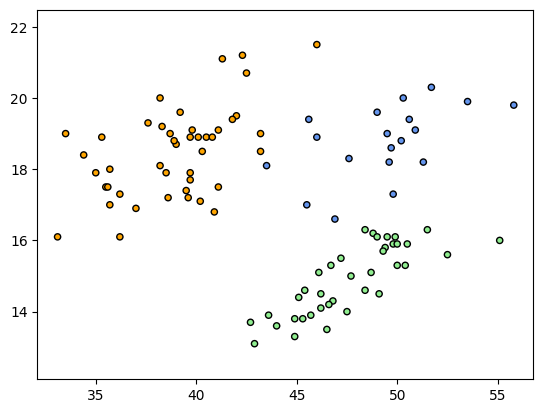

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# For demonstrational purposes, we are going take two features
def plot_two_feature_regions(X, y, n_neighbors=3, resolution=0.02):
  # setup marker generator and color map
  colors = ('orange', 'cornflowerblue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  X = X.loc[:, ['culmen_length_mm', 'culmen_depth_mm']]
  le = LabelEncoder()
  y = le.fit_transform(y) # plot does not accept string labels. We need to transform them into numbers
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

  x1_min, x1_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
  x2_min, x2_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  print(f"Feature 1 {xx1.shape} | Feature 2 {xx2.shape}")


  # Plot the training points
  plt.scatter(X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            c=y_test,
            cmap=cmap,
            edgecolor='k',
            s=20)

  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

plot_two_feature_regions(X, y)

In [ ]:
# @title k-Nearest Neighbors from scratch
import math
import numpy as np

# Euclidean distance
def euclidean(x, y):
  return np.sqrt(np.sum((x-y)**2))

# Locate the most similar neighbors
def get_neighbors(test_row, X_train, y_train, n_neighbors):
	distances = list()
	for (train_row, train_class) in zip(X_train, y_train):
		dist = euclidean(train_row, test_row)
		distances.append((dist, train_class))

  # Ex : [(0.75, 'A'), (1.41, 'A'), (2.23, 'B')]
	distances.sort(key=lambda tple: tple[0])
	neighbors = list()
	for i in range(n_neighbors):
		neighbors.append(distances[i][1])

  # Ex : ['A', 'A', 'B']
	return neighbors

# Get the modal (most common) value in the passed array
# arr = ['A', 'A', 'B']
# vals = ['A', 'B'], cnts = [2, 1]
def mode(arr):
  vals, cnts = np.unique(arr, return_counts=True)
  mode = vals[cnts.argmax()]

  return mode

# Make predictions
def predict(X_test, X_train, y_train, n_neighbors):
  preds = list()
  for test_row in X_test:
    neighbors = get_neighbors(test_row, X_train, y_train, n_neighbors)
    modal = mode(neighbors)
    preds.append(modal)

  return np.array(preds)

# Get accuracy
def accuracy(y_test, preds):
  return (preds == y_test).mean()

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=1)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7920792079207921)

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=2)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7524752475247525)

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=3)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7722772277227723)

In [ ]:
knn_predict_scratch = predict(X_test.values, X_train.values, y_train.values, n_neighbors=4)
accuracy(knn_predict_scratch, y_test)

np.float64(0.7722772277227723)

In [ ]:
# @title From Scikit-Learn API
from sklearn.neighbors import KNeighborsClassifier

**DO IT YOURSELF**: Try other settings for "k" and observe how this affects the classifier performance.

In [ ]:
# Initialize a kNN classifier, with hyperparameter 'k=3'
knn_n3 = KNeighborsClassifier(n_neighbors=3)

# Training the "model": this may lead to confusion, because KNN is an instance-based algorithm, not model based.
# However, scikit-learn still requires using this method, because the "model"
# will be defined by the training instances themselves.
knn_n3.fit(X_train, y_train)

# Making predictions on test data
predictions_n3 = knn_n3.predict(X_test)

accuracy_score(y_test, predictions_n3)

0.7722772277227723

In [ ]:
# 1 cluster assigned

knn_n1 = KNeighborsClassifier(n_neighbors=1)
knn_n1.fit(X_train, y_train)
predictions_n1 = knn_n1.predict(X_test)

accuracy_score(y_test, predictions_n1)

0.7920792079207921

In [ ]:
# 2 cluster assigned

knn_n2 = KNeighborsClassifier(n_neighbors=2)
knn_n2.fit(X_train, y_train)
predictions_n2 = knn_n2.predict(X_test)

accuracy_score(y_test, predictions_n2)

0.7524752475247525

In [ ]:
# 4 cluster assigned

knn_n4 = KNeighborsClassifier(n_neighbors=4)
knn_n4.fit(X_train, y_train)
predictions_n4 = knn_n4.predict(X_test)

accuracy_score(y_test, predictions_n4)

0.7722772277227723

How can we find the best k value? We can calculate the accuracy of the prediction for multiple k values and see which is the best.

In [ ]:
nK = 20
mean_acc = list()
for n in range(1, nK+1):
  knn_mul = KNeighborsClassifier(n_neighbors=n)
  knn_mul.fit(X_train, y_train)
  predictions_mul = knn_mul.predict(X_test)
  mean_acc.append(accuracy_score(y_test, predictions_mul))

mean_acc

[0.7920792079207921,
 0.7524752475247525,
 0.7722772277227723,
 0.7722772277227723,
 0.7227722772277227,
 0.7326732673267327,
 0.7227722772277227,
 0.7623762376237624,
 0.7326732673267327,
 0.7326732673267327,
 0.7623762376237624,
 0.7524752475247525,
 0.7623762376237624,
 0.7524752475247525,
 0.7623762376237624,
 0.7326732673267327,
 0.7128712871287128,
 0.7326732673267327,
 0.7425742574257426,
 0.7425742574257426]

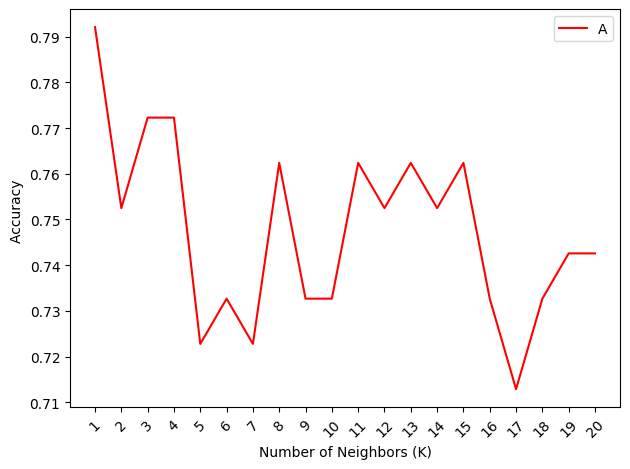

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, nK+1), mean_acc, 'r')
plt.xticks(range(1, nK+1), fontsize=10, rotation=45)
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
# @title Visualization (Decision Boundaries for K-Nearest Neighbors)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# For demonstrational purposes, we are going take two features
def plot_knn_two_feature_regions(X, y, n_neighbors=3, resolution=0.02):
  # setup marker generator and color map
  colors = ('orange', 'cornflowerblue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  X = X.loc[:, ['culmen_length_mm', 'culmen_depth_mm']]
  le = LabelEncoder()
  y = le.fit_transform(y) # plot does not accept string labels. We need to transform them into numbers
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4)

  x1_min, x1_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
  x2_min, x2_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  print(f"Feature 1 {xx1.shape} | Feature 2 {xx2.shape}")

  '''
  xx1 = [[1, 2, 3],    → แถวที่ 1: ค่าของ feature 1
        [1, 2, 3],     → แถวที่ 2: เหมือนเดิม
        [1, 2, 3]]     → ทุกแถว = x-axis เดิมซ้ำ

  xx2 = [[10, 10, 10], → คอลัมน์ที่ 1: y = 10 ซ้ำ
        [20, 20, 20],
        [30, 30, 30]]  → y เพิ่มขึ้นในแต่ละแถว
  '''

  '''
  [(1, 10), (2, 10), (3, 10),
  (1, 20), (2, 20), (3, 20),
  (1, 30), (2, 30), (3, 30)]

  '''

  # kNN prediction
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  Z = knn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

  # Put the result into a color plot
  Z = Z.reshape(xx1.shape)
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap=cmap, shading='nearest')
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

  # Plot the training points
  plt.scatter(X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            c=y_test,
            cmap=cmap,
            edgecolor='k',
            s=20)

  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

  # Predict test set
  y_pred = knn.predict(X_test)

  # ⬅️ คำนวณ accuracy แล้วแสดงผล
  acc = accuracy_score(y_test, y_pred)
  print(f"Accuracy (K = {n_neighbors}) : {acc:.2f}")

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


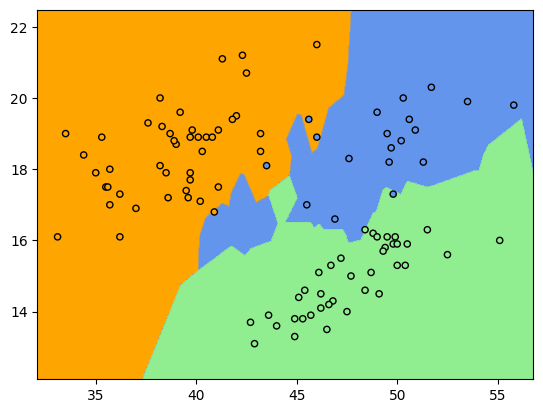

Accuracy (K = 1) : 0.94


In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=1)

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


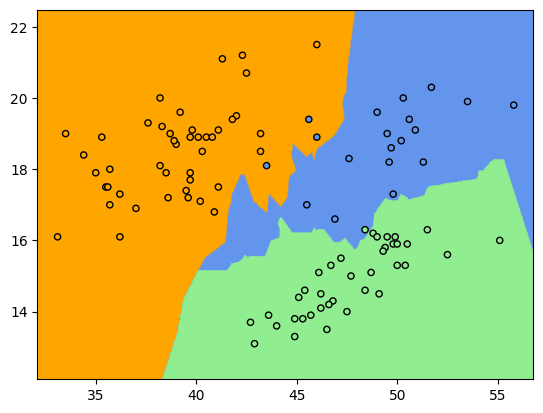

Accuracy (K = 2) : 0.96


In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=2)

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


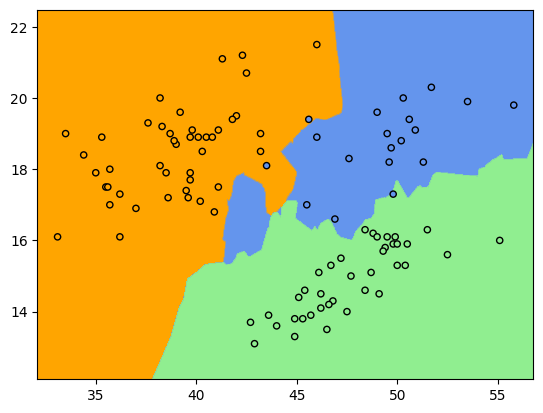

Accuracy (K = 3) : 0.97


In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=3)

Feature 1 (520, 1235) | Feature 2 (520, 1235)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


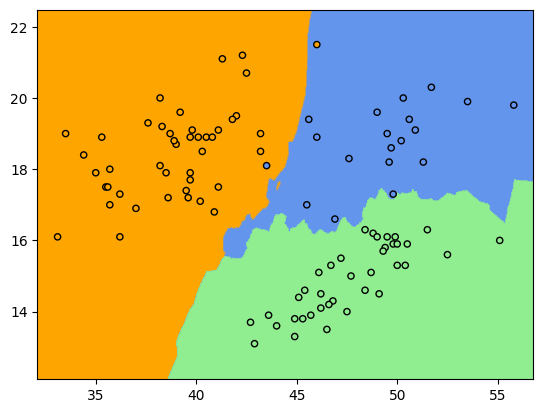

Accuracy (K = 10) : 0.98


In [ ]:
plot_knn_two_feature_regions(X, y, n_neighbors=10)

----
### ฝึกฝนด้วยตัวเอง

1.) (จาก Day1-Dataset Homework) ชุดข้อมูลประเมินคุณภาพไวน์ (Wine quality):
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

\
จากข้อมูลคุณลักษณะที่มี (feature attributes) ได้แบ่งการประเมินเป็นคะแนนคุณภาพ "Quality" column จงสร้างโมเดลแบบ k-Nearest Neighbors (k-NN) คัดแบตซ์ไวน์มีคุณภาพไม่ ให้เกณฑ์การคัดแยกอยุ่ที่ 4.0 และ 6.0 คะแนน (0-3.9 คะแนน = คุณภาพแย่, 4.0-5.9 = คุณภาพปานกลาง, และ 6.0 ขึ้นไป = คุณภาพดี)

\
ทำการเทียบผล confusion matrix ระหว่าง k-NN กับ Logistic Regression
```python
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("piyushgoyal443/red-wine-dataset")

print(os.listdir(path)) # choose "['wineQualityReds.csv']"

csv_path = os.path.join(path, 'wineQualityReds.csv')
df = pd.read_csv(csv_path)
```

2.) ทำการใช้ kNN algorithm มา predict ข้อมูลใน Apple Quality Dataset ใน column ส่วนข้อมูล Quality (binary classification) แล้วหาผลลัพธ์ ดังนี้
  
1. ให้สร้าง train set และ test set จาก dataset ที่กำหนด โดยให้ test_size=0.3 และ random_state=42
2. ใช้ kNN algorithm โดยกำหนดค่า k ทั้งหมด 30 ค่า (1-30) และทำการ log accuracy ของแต่ละ k แสดงในรูปแบบของ line chart พร้อมทั้งระบุว่าค่า k ค่าใดที่ทำให้ model มี accuracy ที่สูงที่สุด (เลือก feature ทั้งหมด ยกเว้น A_id)

3. ทำการสร้าง Decision Boundaries โดยใช้ค่า k = 5 และ k = 10 โดยมีเงื่อนไขคือ
  - เลือก feature 2 feature ที่จะทำให้ค่า accuracy สูงที่สุด โดยเลือกจาก ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity']
  - ทำการแสดง Decision Boundaries และ accuracy ที่ได้

In [ ]:
import kagglehub
import os

# Download latest version
folder_path = kagglehub.dataset_download("nelgiriyewithana/apple-quality")
print(os.listdir(folder_path)) # เลือก "['apple_quality.csv']"

csv_path = os.path.join(folder_path, 'apple_quality.csv')
apple = pd.read_csv(csv_path)

apple.head()

100%|██████████| 170k/170k [00:00<00:00, 56.3MB/s]

Extracting files...
['apple_quality.csv']


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
